In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

K = 5000000

review_path = r'E:\Download\yelp_dataset\yelp_academic_dataset_review.json'

def load_json(file_path, start_row, end_row):
    selected_lines = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if start_row <= i < end_row:
                selected_lines.append(line)
            elif i >= end_row:
                break

    data = [json.loads(line) for line in selected_lines]
    df = pd.DataFrame(data)
    return df

In [2]:
df_review = load_json(review_path, 0, K)
df_review = df_review[df_review['useful'] > 10]
df_review['date'] = pd.to_datetime(df_review['date'])
latest_date = max(df_review['date'])
df_review['date'] = (latest_date - df_review['date']).dt.days // 365 + 1
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
129,r-PjI5sBvNoBekk5mURNww,uzy_KYIZx65cp7Yh8_seeQ,ZuM1vcZ_ObCjCCGweYzItg,5.0,15,0,2,"I took the beginning class there, and I loved ...",9
174,RdeS7gqrmVs5kJtazzVr3A,_cdKam8UxhoPni6YwP1LQw,J55AT36H5EeJ9ey8etGjHA,5.0,14,6,9,This small little donut bakery is located in o...,9
362,v6wULImVULtf6ZfFljX_4Q,ovUBZdJI16y-qasoqnGt5Q,2S_CEQYBbp8RO1bJm_1mng,3.0,11,12,6,Uhhhhh.... Not sure how to quantify or qualify...,10
381,MWUGmzyXVIlG2NwvzX0q4Q,Xw7ZjaGfr0WNVt6s_5KZfA,i-tDq8zC7ZmSqSbg_7oddA,5.0,11,5,8,What an AMAZING occurrence that we ended up he...,6
408,OiiUQHpUPSIw592zKebnTg,Wshkpj8aHWuzIeca1QxWTA,R-HCwu9UbasUudG1yTM1Ow,1.0,13,19,6,I am positively LIVID.\n\nI went to check my a...,13


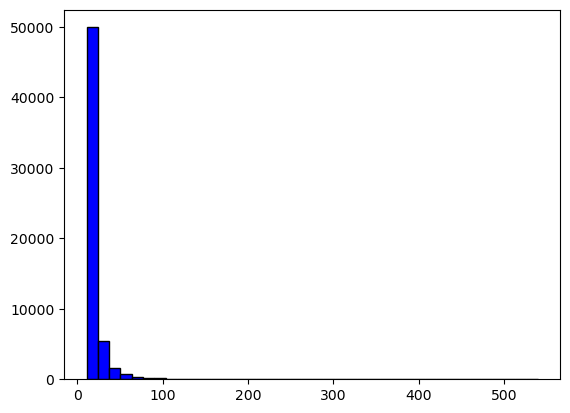

In [3]:
plt.hist(df_review['useful'], bins=40, color='blue', edgecolor='black')
plt.show()

In [4]:
df_review['useful'].describe()

count    58618.000000
mean        18.625013
std         14.064683
min         11.000000
25%         12.000000
50%         15.000000
75%         20.000000
max        539.000000
Name: useful, dtype: float64

In [5]:
user_path = r'E:\Download\yelp_dataset\yelp_academic_dataset_user.json'
selected_users = set(df_review['user_id'])
selected_lines = []

with open(user_path, 'r', encoding='utf-8') as file:
    for i, line in enumerate(file):
        if i%10000 == 0:
            print(i)
        data = json.loads(line)
        if data['user_id'] in selected_users:
            selected_lines.append(line)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [6]:
data = [json.loads(line) for line in selected_lines]
df_user = pd.DataFrame(data)
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
3,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
4,QF1Kuhs8iwLWANNZxebTow,Catherine,607,2009-04-27 20:25:54,4573,3714,4149,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","dLts9bY66tXEFqYG03YFgw, SYDGMC7d5NnMiT1l_WQq5A...",131,...,79,68,29,23,144,407,808,808,587,723


In [7]:
df_user.rename(columns={'useful': 'history_useful',
                        'funny': 'history_funny',
                        'cool': 'history_cool'}, inplace=True)

df_user['elite'] = df_user['elite'].apply(lambda x: len(x.split(',')) if x else 0)
df_user['friends'] = df_user['friends'].apply(lambda x: len(x.split(',')) if x != 'None' else 0)

df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
df_user['yelping_since'] = (pd.to_datetime('2019-01-01') - df_user['yelping_since']).dt.days // 365

In [8]:
df_combined = pd.merge(df_user, df_review.groupby('user_id')['useful'].max().reset_index(), on='user_id', how='inner')
df_combined = df_combined.drop(['user_id', 'name'], axis=1)
df_combined.head()

,review_count,yelping_since,history_useful,history_funny,history_cool,elite,friends,fans,average_stars,compliment_hot,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,useful
0,585,11,7217,1259,5994,1,14995,267,3.91,250,...,55,56,18,232,844,467,467,239,180,32
1,4333,9,43091,13066,27281,14,4646,3138,3.74,1145,...,184,157,251,1847,7054,3131,3131,1521,1946,13
2,224,13,512,330,299,3,131,28,4.27,24,...,1,6,2,12,16,26,26,10,9,15
3,1221,13,14953,9940,11211,9,5843,1357,3.85,1713,...,191,361,147,1212,5696,2543,2543,815,323,15
4,607,9,4573,3714,4149,13,487,131,4.11,1020,...,68,29,23,144,407,808,808,587,723,11


In [9]:
df_combined.describe()

,review_count,yelping_since,history_useful,history_funny,history_cool,elite,friends,fans,average_stars,compliment_hot,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,useful
count,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,...,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000,25461.000000
mean,139.659951,5.987707,985.895526,516.775696,768.468560,1.602333,208.030871,27.287538,3.423934,70.407172,...,6.957936,4.385924,2.484898,44.936059,117.359687,106.537214,106.537214,33.669809,59.833942,18.474962
std,375.256650,2.646576,5170.552416,3358.585383,4646.209862,3.096577,644.741546,140.376414,0.917576,589.329550,...,125.106463,96.572682,85.941103,513.908396,995.160451,782.639573,782.639573,266.274031,812.961114,15.043855
min,1.000000,-3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,8.000000,4.000000,25.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,27.000000,6.000000,58.000000,11.000000,11.000000,0.000000,23.000000,1.000000,3.660000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,118.000000,8.000000,246.000000,64.000000,96.000000,2.000000,145.000000,9.000000,4.030000,4.000000,...,0.000000,0.000000,0.000000,6.000000,7.000000,8.000000,8.000000,5.000000,1.000000,19.000000
max,17473.000000,14.000000,206296.000000,185823.000000,199878.000000,17.000000,14995.000000,12497.000000,5.000000,25784.000000,...,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000,539.000000


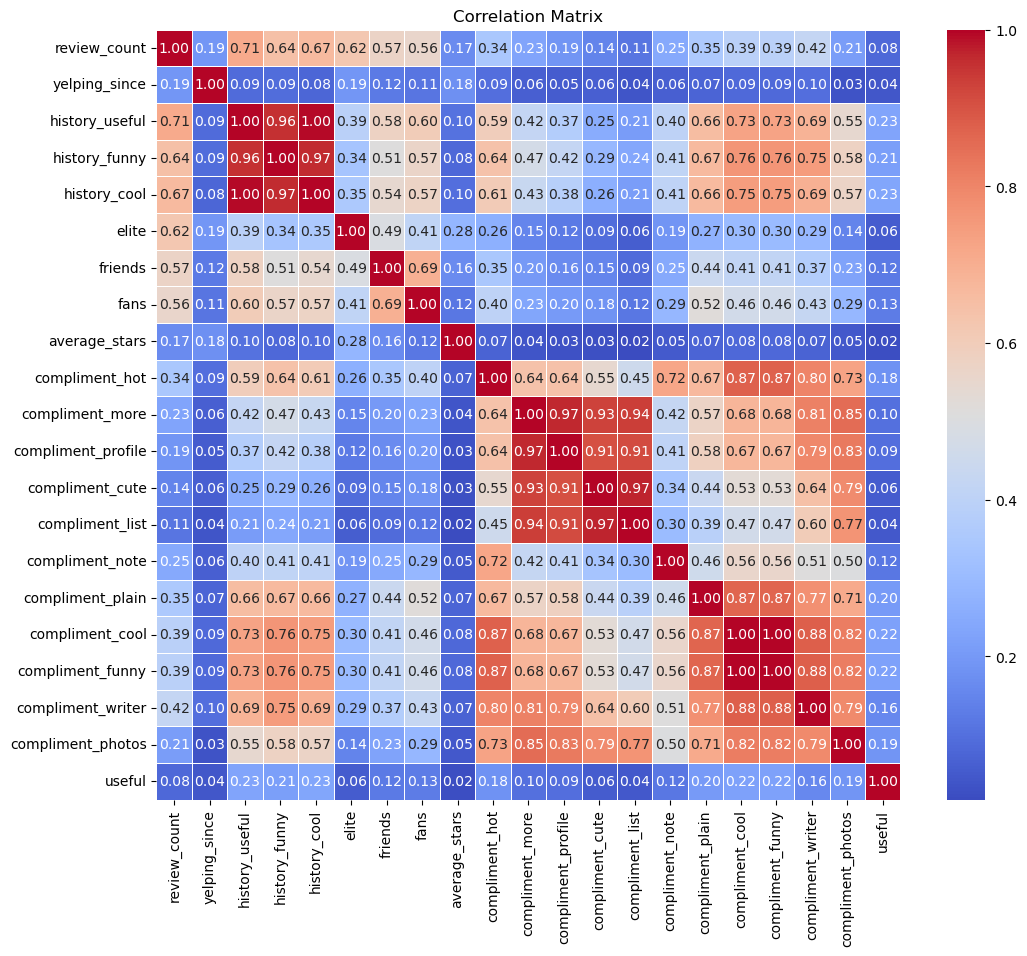

In [10]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### ***

### ***

### ***

In [11]:
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

X = df_combined.drop(columns=['useful'])
y = df_combined['useful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
param_grid = {
    'objective': ['reg:squarederror'],
    'max_depth': [3, 4, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_reg = XGBRegressor(random_state=42)
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [13]:
mae

5.435703629996111

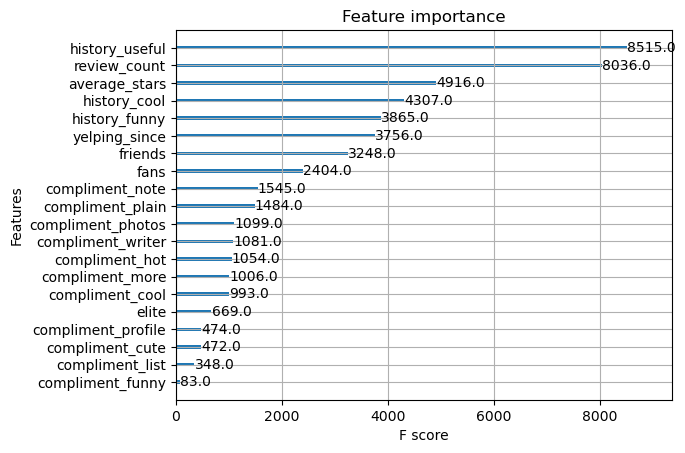

In [14]:
plot_importance(best_model)
plt.show()

In [15]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(best_model.feature_importances_)
best_mae = float('inf')
best_feat = None

for t in thresholds:
    selection = SelectFromModel(best_model, threshold=t, prefit=True)
    select_X_train = selection.transform(X_train)
    select_X_test = selection.transform(X_test)
    
    selection_model = XGBRegressor(**best_params)
    selection_model.fit(select_X_train, y_train)
    y_pred = selection_model.predict(select_X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("t=%.3f, n=%d, MAE: %.3f, RMSE: %.3f" % (t, select_X_train.shape[1], mae, rmse))
    
    if mae < best_mae:
        best_select_model = selection_model
        best_mae = mae
        best_select_test = select_X_test
        best_select_train = select_X_train

best_select_model.save_model('saved_model/xgb_regression_user_25k_useful.model')
# np.save('xgb_regression_user_25k_useful_best_feat_test.npy', best_select_test)
# np.save('xgb_regression_user_25k_useful_best_feat_train.npy', best_select_train)

t=0.012, n=20, MAE: 5.433, RMSE: 13.531
t=0.016, n=19, MAE: 5.437, RMSE: 13.606
t=0.018, n=18, MAE: 5.420, RMSE: 13.542
t=0.019, n=17, MAE: 5.420, RMSE: 13.542
t=0.021, n=16, MAE: 5.414, RMSE: 13.528
t=0.021, n=15, MAE: 5.417, RMSE: 13.524
t=0.022, n=14, MAE: 5.427, RMSE: 13.575
t=0.023, n=13, MAE: 5.426, RMSE: 13.563
t=0.025, n=12, MAE: 5.437, RMSE: 13.619
t=0.026, n=11, MAE: 5.422, RMSE: 13.579
t=0.027, n=10, MAE: 5.445, RMSE: 13.516
t=0.028, n=9, MAE: 5.436, RMSE: 13.488
t=0.031, n=8, MAE: 5.447, RMSE: 13.511
t=0.034, n=7, MAE: 5.432, RMSE: 13.484
t=0.044, n=6, MAE: 5.445, RMSE: 13.533
t=0.046, n=5, MAE: 5.471, RMSE: 13.603
t=0.075, n=4, MAE: 5.521, RMSE: 13.810
t=0.076, n=3, MAE: 5.603, RMSE: 14.675
t=0.160, n=2, MAE: 6.086, RMSE: 16.122
t=0.276, n=1, MAE: 6.336, RMSE: 16.363


In [16]:
best_mae

5.413554670205407

### ***

### ***

### ***

In [ ]:
# Process
def df_user_process(df_review):
    # return df_user containing all users existing in df_review
    user_path = r'E:\Download\yelp_dataset\yelp_academic_dataset_user.json' # modify the user.json path ***
    selected_users = set(df_review['user_id'])
    selected_lines = []

    with open(user_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if i%10000 == 0:
                print(i)
            data = json.loads(line)
            if data['user_id'] in selected_users:
                selected_lines.append(line)

    data = [json.loads(line) for line in selected_lines]
    df_user = pd.DataFrame(data)

    df_user.rename(columns={'useful': 'history_useful',
                            'funny': 'history_funny',
                            'cool': 'history_cool'}, inplace=True)

    df_user['elite'] = df_user['elite'].apply(lambda x: len(x.split(',')) if x else 0)
    df_user['friends'] = df_user['friends'].apply(lambda x: len(x.split(',')) if x != 'None' else 0)

    latest_date = max(df_review['date'])
    df_user['yelping_since'] = pd.to_datetime(df_user['yelping_since'])
    df_user['yelping_since'] = (latest_date - df_user['yelping_since']).dt.days // 365
    
    df_user = df_user.drop(['compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_funny'], axis=1)
    return df_user

def df_comb_process(df_review, df_user):
    # return df_combined for train/test/val (Y - useful; X- others)
    df_combined = pd.merge(df_user, df_review.groupby('user_id')['useful'].max().reset_index(), on='user_id', how='inner')
    df_combined = df_combined.drop(['user_id', 'name'], axis=1)
    return df_combined